In [1]:
import json

In [2]:
basePath = '../CWB_Data/'
with open(basePath + '20231210_AutoData.json', 'r') as f:
    autoStationData = json.load(f)

In [3]:
stationDataList = autoStationData['records']['Station']
taipeiAutoStationIndexList = []
for index in range(len(stationDataList)):
    if stationDataList[index]['GeoInfo']['CountyName'] == '臺北市' or  stationDataList[index]['GeoInfo']['CountyName'] == '新北市' :
        taipeiAutoStationIndexList.append(index)

In [4]:
test = stationDataList[0]
test

{'StationName': '鼻頭',
 'StationId': 'C0R860',
 'ObsTime': {'DateTime': '2023-12-10T17:00:00+08:00'},
 'GeoInfo': {'Coordinates': [{'CoordinateName': 'TWD67',
    'CoordinateFormat': 'decimal degrees',
    'StationLatitude': 22.106108,
    'StationLongitude': 120.88986},
   {'CoordinateName': 'WGS84',
    'CoordinateFormat': 'decimal degrees',
    'StationLatitude': 22.1043,
    'StationLongitude': 120.89788}],
  'StationAltitude': '31.0',
  'CountyName': '屏東縣',
  'TownName': '滿州鄉',
  'CountyCode': '10013',
  'TownCode': '10013240'},
 'WeatherElement': {'Weather': '多雲有雨',
  'Now': {'Precipitation': 1.5},
  'WindDirection': 15.0,
  'WindSpeed': 7.9,
  'AirTemperature': 23.1,
  'RelativeHumidity': 97,
  'AirPressure': 1010.1,
  'GustInfo': {'PeakGustSpeed': -99.0,
   'Occurred_at': {'WindDirection': -99.0, 'DateTime': '-99'}},
  'DailyExtreme': {'DailyHigh': {'TemperatureInfo': {'AirTemperature': 24.7,
     'Occurred_at': {'DateTime': '2023-12-10T01:30:00+08:00'}}},
   'DailyLow': {'Tempe

In [5]:
test['WeatherElement']['WindDirection']

15.0

In [6]:
townDict = {'臺北市':{}, '新北市':{}}

for stationIndex in taipeiAutoStationIndexList:
    tempData = stationDataList[stationIndex]
    if tempData['GeoInfo']['CountyName'] == '臺北市':
        tempTownName = tempData['GeoInfo']['TownName']
        if tempTownName not in townDict['臺北市']:
            townDict['臺北市'][tempTownName] = []
        townDict['臺北市'][tempTownName].append(tempData['StationName'])
    else:
        tempTownName = tempData['GeoInfo']['TownName']
        if tempTownName not in townDict['新北市']:
            townDict['新北市'][tempTownName] = []
        townDict['新北市'][tempTownName].append(tempData['StationName'])

outPath = "../FrontEnd_Data/"
resultJsonStr = json.dumps(townDict, indent=2, ensure_ascii=False)
with open(outPath + "StationDict.json", "w",  encoding="utf-8") as outfile:
    outfile.write(resultJsonStr)

In [7]:
basePath = "../FrontEnd_Data/"
with open(basePath + 'StationDict.json', 'r') as f:
    rStationDict = json.load(f)
regions = {f"{city}-{town}": rStationDict[city][town] for city in rStationDict for town in rStationDict[city]}
regions

{'臺北市-士林區': ['科教館', '天母', '社子', '平等'],
 '臺北市-松山區': ['松山'],
 '臺北市-信義區': ['信義'],
 '臺北市-文山區': ['文山'],
 '臺北市-內湖區': ['內湖'],
 '臺北市-北投區': ['大屯山', '石牌'],
 '新北市-貢寮區': ['澳底', '三貂角', '福隆'],
 '新北市-萬里區': ['野柳', '大坪'],
 '新北市-淡水區': ['淡水觀海', '六塊厝'],
 '新北市-石門區': ['石門', '白沙灣', '富貴角'],
 '新北市-瑞芳區': ['水湳洞', '瑞芳', '鼻頭角', '五分山'],
 '新北市-三芝區': ['田寮', '三芝'],
 '新北市-板橋區': ['板橋'],
 '新北市-烏來區': ['福山植物園', '福山', '桶後'],
 '新北市-坪林區': ['坪林', '四堵'],
 '新北市-雙溪區': ['泰平', '雙溪'],
 '新北市-汐止區': ['五指山', '汐止'],
 '新北市-三峽區': ['三峽'],
 '新北市-新莊區': ['新莊'],
 '新北市-樹林區': ['山佳'],
 '新北市-金山區': ['三和', '金山'],
 '新北市-石碇區': ['石碇'],
 '新北市-平溪區': ['火燒寮'],
 '新北市-中和區': ['中和'],
 '新北市-八里區': ['八里'],
 '新北市-蘆洲區': ['蘆洲'],
 '新北市-土城區': ['土城'],
 '新北市-鶯歌區': ['鶯歌'],
 '新北市-永和區': ['永和'],
 '新北市-林口區': ['林口'],
 '新北市-深坑區': ['深坑'],
 '新北市-五股區': ['五股'],
 '新北市-新店區': ['屈尺'],
 '新北市-三重區': ['三重']}

In [8]:
with open('../CWB_Data/20231218_NewTaipei7Day.json', 'r') as f:
    newTaipeiData = json.load(f)

with open('../CWB_Data/20231218_Taipei7Day.json', 'r') as f:
    taipeiData = json.load(f)
    
selected_city = '新北市-石門區'
city = selected_city.split('-')[0]
town = selected_city.split('-')[1]

if city == '臺北市':
    locationDataList = taipeiData['records']['locations'][0]['location']
else:
    locationDataList = newTaipeiData['records']['locations'][0]['location']
    
for index in range(len(locationDataList)):
    if locationDataList[index]['locationName'] == town:
        targetLocationData = locationDataList[index]
        break
targetLocationData

{'locationName': '石門區',
 'geocode': '65000220',
 'lat': '25.293055',
 'lon': '121.559408',
 'weatherElement': [{'elementName': 'PoP12h',
   'description': '12小時降雨機率',
   'time': [{'startTime': '2023-12-18 12:00:00',
     'endTime': '2023-12-18 18:00:00',
     'elementValue': [{'value': '20', 'measures': '百分比'}]},
    {'startTime': '2023-12-18 18:00:00',
     'endTime': '2023-12-19 06:00:00',
     'elementValue': [{'value': '50', 'measures': '百分比'}]},
    {'startTime': '2023-12-19 06:00:00',
     'endTime': '2023-12-19 18:00:00',
     'elementValue': [{'value': '80', 'measures': '百分比'}]},
    {'startTime': '2023-12-19 18:00:00',
     'endTime': '2023-12-20 06:00:00',
     'elementValue': [{'value': '90', 'measures': '百分比'}]},
    {'startTime': '2023-12-20 06:00:00',
     'endTime': '2023-12-20 18:00:00',
     'elementValue': [{'value': '90', 'measures': '百分比'}]},
    {'startTime': '2023-12-20 18:00:00',
     'endTime': '2023-12-21 06:00:00',
     'elementValue': [{'value': '80', 'measur

In [9]:
import pandas as pd
# get future weather data  
def weather_data_to_df(inputData):
    timeData = []
    weatherData = []
    for entry in inputData['time']:
        timeData.append(entry['startTime'])
        weatherData.append(entry['elementValue'][0]['value'])

    # 創建DataFrame
    tempDf = pd.DataFrame({'Time': pd.to_datetime(timeData), inputData['description']: weatherData})
    return tempDf

In [10]:
import numpy as np
def wind_direction_str_to_degree(direction):
    directions = {
        '北風': 0,
        '偏北風': 45,
        '東北風': 45,
        '偏東風': 90,
        '東風': 90,
        '偏南風': 135,
        '東南風': 135,
        '南風': 180,
        '偏西風': 225,
        '西南風': 225,
        '西風': 270,
        '偏西北風': 315,
        '西北風': 315,
        '北風': 0,
    }
    return directions.get(direction, np.nan)

In [11]:
import re
def wind_speed_str_to_int(speedStr):
    numeric_part = re.search(r'\d+', speedStr).group()
    return int(numeric_part)

In [12]:
weeklyAverageTemperature = targetLocationData['weatherElement'][1]
weeklyAverageTemperatureDf = weather_data_to_df(weeklyAverageTemperature)
weeklyWindDirection = targetLocationData['weatherElement'][13]
weeklyWindDirectionDf = weather_data_to_df(weeklyWindDirection)
tempDescription = weeklyWindDirection['description']
weeklyWindDirectionDf[tempDescription] = weeklyWindDirectionDf[tempDescription].apply(wind_direction_str_to_degree)
weeklyWindSpeed = targetLocationData['weatherElement'][4]
weeklyWindSpeedDf = weather_data_to_df(weeklyWindSpeed)
tempDescription = weeklyWindSpeed['description']
weeklyWindSpeedDf[tempDescription] = weeklyWindSpeedDf[tempDescription].apply(wind_speed_str_to_int)

In [13]:
weeklyWindSpeedDf

,Time,最大風速
0,2023-12-18 12:00:00,7
1,2023-12-18 18:00:00,6
2,2023-12-19 06:00:00,8
3,2023-12-19 18:00:00,11
4,2023-12-20 06:00:00,11
5,2023-12-20 18:00:00,11
6,2023-12-21 06:00:00,11
7,2023-12-21 18:00:00,11
8,2023-12-22 06:00:00,10
9,2023-12-22 18:00:00,10


In [14]:
basePath = '../CWB_Data/'
with open(basePath + '20231210_Taipei7Day.json', 'r') as f:
    taipeiData = json.load(f)

In [15]:
locationDataList = taipeiData['records']['locations'][0]['location']
for index in range(len(locationDataList)):
    if locationDataList[index]['locationName'] == '松山區':
        print(index)

8


In [16]:
locationDataList[10]

{'locationName': '士林區',
 'geocode': '63000110',
 'lat': '25.094612',
 'lon': '121.511458',
 'weatherElement': [{'elementName': 'PoP12h',
   'description': '12小時降雨機率',
   'time': [{'startTime': '2023-12-10 18:00:00',
     'endTime': '2023-12-11 06:00:00',
     'elementValue': [{'value': '20', 'measures': '百分比'}]},
    {'startTime': '2023-12-11 06:00:00',
     'endTime': '2023-12-11 18:00:00',
     'elementValue': [{'value': '0', 'measures': '百分比'}]},
    {'startTime': '2023-12-11 18:00:00',
     'endTime': '2023-12-12 06:00:00',
     'elementValue': [{'value': '30', 'measures': '百分比'}]},
    {'startTime': '2023-12-12 06:00:00',
     'endTime': '2023-12-12 18:00:00',
     'elementValue': [{'value': '20', 'measures': '百分比'}]},
    {'startTime': '2023-12-12 18:00:00',
     'endTime': '2023-12-13 06:00:00',
     'elementValue': [{'value': '30', 'measures': '百分比'}]},
    {'startTime': '2023-12-13 06:00:00',
     'endTime': '2023-12-13 18:00:00',
     'elementValue': [{'value': '10', 'measure

In [17]:
temp2 = locationDataList[10]

In [18]:
for i in temp2['weatherElement']:
    print(i['description'])

12小時降雨機率
平均溫度
平均相對濕度
最小舒適度指數
最大風速
最高體感溫度
天氣現象
最大舒適度指數
最低溫度
紫外線指數
天氣預報綜合描述
最低體感溫度
最高溫度
風向
平均露點溫度


In [19]:
# average temperature
temp2['weatherElement'][1]
#wind speed
temp2['weatherElement'][4]
#lowest temperature
# temp2['weatherElement'][8]
#highest temperature
# temp2['weatherElement'][12]
#wind direction
# temp2['weatherElement'][13]

{'elementName': 'WS',
 'description': '最大風速',
 'time': [{'startTime': '2023-12-10 18:00:00',
   'endTime': '2023-12-11 06:00:00',
   'elementValue': [{'value': '1', 'measures': '公尺/秒'},
    {'value': '<= 1', 'measures': '蒲福風級'}]},
  {'startTime': '2023-12-11 06:00:00',
   'endTime': '2023-12-11 18:00:00',
   'elementValue': [{'value': '1', 'measures': '公尺/秒'},
    {'value': '<= 1', 'measures': '蒲福風級'}]},
  {'startTime': '2023-12-11 18:00:00',
   'endTime': '2023-12-12 06:00:00',
   'elementValue': [{'value': '1', 'measures': '公尺/秒'},
    {'value': '<= 1', 'measures': '蒲福風級'}]},
  {'startTime': '2023-12-12 06:00:00',
   'endTime': '2023-12-12 18:00:00',
   'elementValue': [{'value': '4', 'measures': '公尺/秒'},
    {'value': '3', 'measures': '蒲福風級'}]},
  {'startTime': '2023-12-12 18:00:00',
   'endTime': '2023-12-13 06:00:00',
   'elementValue': [{'value': '4', 'measures': '公尺/秒'},
    {'value': '3', 'measures': '蒲福風級'}]},
  {'startTime': '2023-12-13 06:00:00',
   'endTime': '2023-12-13 18

In [20]:
# 提取時間和溫度數據
import pandas as pd
data = temp2['weatherElement'][1]
time_data = []
temperature_data = []
for entry in data['time']:
    time_data.append(entry['startTime'])
    temperature_data.append(float(entry['elementValue'][0]['value']))

# 創建DataFrame
df = pd.DataFrame({'Time': pd.to_datetime(time_data), 'Temperature (°C)': temperature_data})
df

,Time,Temperature (°C)
0,2023-12-10 18:00:00,23.0
1,2023-12-11 06:00:00,26.0
2,2023-12-11 18:00:00,23.0
3,2023-12-12 06:00:00,20.0
4,2023-12-12 18:00:00,19.0
5,2023-12-13 06:00:00,20.0
6,2023-12-13 18:00:00,20.0
7,2023-12-14 06:00:00,24.0
8,2023-12-14 18:00:00,21.0
9,2023-12-15 06:00:00,24.0


In [21]:
def weather_data_to_df(inputData):
    timeData = []
    weatherData = []
    for entry in inputData['time']:
        timeData.append(entry['startTime'])
        weatherData.append(entry['elementValue'][0]['value'])

    # 創建DataFrame
    tempDf = pd.DataFrame({'Time': pd.to_datetime(timeData), inputData['description']: weatherData})
    return tempDf

In [22]:
import numpy as np
def wind_direction_to_degree(direction):
    directions = {
        '北風': 0,
        '偏北風': 45,
        '東北風': 45,
        '偏東風': 90,
        '東風': 90,
        '偏南風': 135,
        '東南風': 135,
        '南風': 180,
        '偏西風': 225,
        '西南風': 225,
        '西風': 270,
        '偏西北風': 315,
        '西北風': 315,
        '北風': 0,
    }
    return directions.get(direction, np.nan)


In [23]:
a = weather_data_to_df(temp2['weatherElement'][13])
columnName = temp2['weatherElement'][13]['description']
a[columnName] = a[columnName].apply(wind_direction_to_degree)
a

,Time,風向
0,2023-12-10 18:00:00,90
1,2023-12-11 06:00:00,225
2,2023-12-11 18:00:00,90
3,2023-12-12 06:00:00,45
4,2023-12-12 18:00:00,45
5,2023-12-13 06:00:00,90
6,2023-12-13 18:00:00,90
7,2023-12-14 06:00:00,135
8,2023-12-14 18:00:00,90
9,2023-12-15 06:00:00,225


In [24]:
len(a)

15

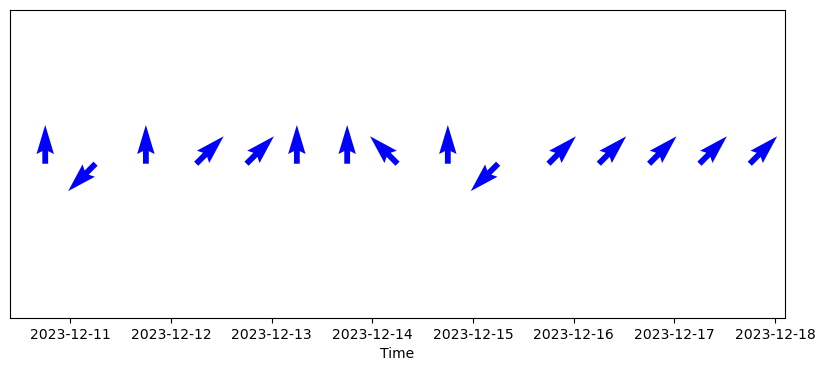

In [25]:
import matplotlib.pyplot as plt
# 轉換風向為弧度
a['WindDirectionRad'] = np.radians(a['風向'])

# 設定圖表大小
fig, ax = plt.subplots(figsize=(10, 4))

# 繪製箭頭
ax.scatter(a['Time'], [1] * len(a), marker='o', color='white', s=1000, zorder=1)
ax.quiver(a['Time'], [1] * len(a), np.cos(a['WindDirectionRad']), np.sin(a['WindDirectionRad']),
          scale=20, color='blue', zorder=2)

# 設定 x 軸標籤、 y 軸標籤等
ax.set_xlabel('Time')
ax.set_yticks([])  # 不顯示 y 軸刻度

# 顯示圖表
plt.show()

In [26]:
a = weather_data_to_df(temp2['weatherElement'][1])

In [27]:
b = weather_data_to_df(temp2['weatherElement'][13])

In [28]:
weeklyAverageTemperature = temp2['weatherElement'][1]
weeklyAverageTemperatureDf = weather_data_to_df(weeklyAverageTemperature)

weeklyWindSpeed = temp2['weatherElement'][4]
weeklyWindSpeedDf = weather_data_to_df(weeklyWindSpeed)
    
weeklyLowTemperature = temp2['weatherElement'][8]
weeklyLowTemperatureDf = weather_data_to_df(weeklyLowTemperature)
    
weeklyHighTemperature = temp2['weatherElement'][12]
weeklyHighTemperatureDf = weather_data_to_df(weeklyHighTemperature)

weeklyWindDirection = temp2['weatherElement'][13]
weeklyWindDirectionDf = weather_data_to_df(weeklyWindDirection)
tempColumnName = weeklyWindDirection['description']
weeklyWindDirectionDf[tempColumnName] = weeklyWindDirectionDf[tempColumnName].apply(wind_direction_to_degree)

weeklyData = weeklyAverageTemperatureDf.merge(weeklyWindSpeedDf, on='Time')
weeklyData = weeklyData.merge(weeklyLowTemperatureDf, on='Time')
weeklyData = weeklyData.merge(weeklyHighTemperatureDf, on='Time')
weeklyData = weeklyData.merge(weeklyWindDirectionDf, on='Time')
weeklyData.to_json('testWeeklyData.json', orient='records', force_ascii=False)

In [29]:
weeklyData

,Time,平均溫度,最大風速,最低溫度,最高溫度,風向
0,2023-12-10 18:00:00,23,1,21,24,90
1,2023-12-11 06:00:00,26,1,21,29,225
2,2023-12-11 18:00:00,23,1,21,24,90
3,2023-12-12 06:00:00,20,4,19,21,45
4,2023-12-12 18:00:00,19,4,19,19,45
5,2023-12-13 06:00:00,20,4,19,21,90
6,2023-12-13 18:00:00,20,3,20,20,90
7,2023-12-14 06:00:00,24,2,20,26,135
8,2023-12-14 18:00:00,21,2,20,22,90
9,2023-12-15 06:00:00,24,3,20,27,225


In [30]:
import joblib
from sklearn import preprocessing
import pandas as pd
import numpy as np

In [31]:
#set variables
numSamplesDict = {'blades_angle(°)': 19, 'gearbox_temperature(°C)': 13,
            'engine_temperature(°C)': 11, 'motor_torque(N-m)': 21,
            'resistance(ohm)': 16, 'blade_breadth(m)': 10
            }
minBladeAngle = -180
maxBladeAngle = 180
minGearBoxTempature = -273
maxGearBoxTempature = 999
minEngineTempature = 0
maxEngineTempature = 50
minMotorTorque = -1500
maxMotorTorque = 3500
minResistance = -1000
maxResistance = 5000
minbladeBreath = 0.1
maxbladeBreath = 1

bladesAngleValue = np.linspace(minBladeAngle, maxBladeAngle, numSamplesDict['blades_angle(°)'])
gearBoxTempatureValue = np.linspace(minGearBoxTempature, maxGearBoxTempature, numSamplesDict['gearbox_temperature(°C)'])
engineTemperature = np.linspace(minEngineTempature, maxEngineTempature, numSamplesDict['engine_temperature(°C)'])
motorTorqueValue = np.linspace(minMotorTorque, maxMotorTorque, numSamplesDict['motor_torque(N-m)'])
resistanceValue = np.linspace(minResistance, maxResistance, numSamplesDict['resistance(ohm)'])
bladeBreathValue = np.linspace(minbladeBreath, maxbladeBreath, numSamplesDict['blade_breadth(m)'])

In [32]:
turbineStatusList = ['A2', 'AAA', 'AB', 'ABC', 'AC', 'B', 'B2', 'BA', 'BB', 'BBB', 'BCB', 'BD', 'D']
        
def get_turbine_status_one_hot_dict(inputStatus):
    #temp onehot
    statusOneHotdf = pd.DataFrame({'turbine_status': [f'turbine_status_{status}' for status in turbineStatusList]})
    statusOneHotEncoding = pd.get_dummies(statusOneHotdf['turbine_status'])
    tempIndex = turbineStatusList.index(inputStatus)
    return statusOneHotEncoding.iloc[tempIndex].to_dict()

In [47]:
weeklyData = weeklyAverageTemperatureDf.merge(weeklyWindSpeedDf, on='Time')
weeklyData = weeklyData.merge(weeklyWindDirectionDf, on='Time')
model = joblib.load('../Model/final_random_forest.joblib')
trainDataDf = pd.read_json('../Model/trainDataDf.json')
numCols = [col for col in trainDataDf.columns if trainDataDf[col].dtype == 'float64']
xscaler = preprocessing.StandardScaler().fit(trainDataDf[numCols])
bestGenerateList = []
# 定義範圍限制
parameter_ranges = {
    'blades_angle(°)': (-180, 180),
    'gearbox_temperature(°C)': (-273, 999),
    'engine_temperature(°C)': (0, 50),
    'motor_torque(N-m)': (-1500, 3500),
    'resistance(ohm)': (-1000, 5000),
    'blade_breadth(m)': (0.1, 1)
}

# 設定遺傳算法的參數
population_size = 15
generations = 20
mutation_rate = 0.4

for index, row in weeklyData.iterrows():
    # 預測發電量
    weatherDict1 = {
        'wind_speed(m/s)': [row[weeklyWindSpeed['description']]],
        'atmospheric_temperature(°C)': [row[weeklyAverageTemperature['description']]]
    }

    windmillDict1 = {'blades_angle(°)': 0, 'gearbox_temperature(°C)': 0,
                        'engine_temperature(°C)': 0, 'motor_torque(N-m)': 0
                        }

    weatherDict2 = {
        'atmospheric_pressure(Pascal)': [101380],
        'area_temperature(°C)': [row[weeklyAverageTemperature['description']]],
        'wind_direction(°)': [row[weeklyWindDirection['description']]],
    }
    windmillDict2 = {'resistance(ohm)': 0, 'blade_breadth(m)': 0}

    statusDict = get_turbine_status_one_hot_dict('BA')

    keys = list(windmillDict1.keys())
    keys.extend(list(windmillDict2.keys()))
    baseDict = weatherDict1.copy()
    baseDict.update(windmillDict1)
    baseDict.update(weatherDict2)
    baseDict.update(windmillDict2)
    baseDict.update(statusDict)
    
    # 初始化隨機族群
    population = []
    for _ in range(population_size):
        individual = {
            param: np.random.uniform(param_range[0], param_range[1]) if param != 'blade_breadth(m)' else np.random.uniform(param_range[0], param_range[1])
            for param, param_range in parameter_ranges.items()
        }
        population.append(individual)

    # 遺傳算法的主迴圈
    for generation in range(generations):
        # 評估族群中每個個體的預測功率
        fitness_scores = []
        for individual in population:
            input_data = pd.DataFrame({**baseDict, **individual}, index=[0])
            input_data[numCols] = xscaler.transform(input_data[numCols])
            predicted_power = model.predict(input_data)[0]
            fitness_scores.append(predicted_power)

        # 找到最佳個體及其預測功率
        best_index = np.argmax(fitness_scores)
        best_individual = population[best_index]
        best_power = fitness_scores[best_index]

        print(f"Generation {generation + 1}: Best Predicted Power = {best_power}")

        # 選擇優良個體進行繁殖
        # 進行排序，得到的索引按照預測功率從大到小的順序排列
        selected_indices = np.argsort(fitness_scores)[-population_size // 2:]
        selected_population = [population[i] for i in selected_indices]

        ## 進行交叉操作（向量化）
        offspring = []
        # 確保新一代的個體數量達到族群大小 
        for _ in range(population_size - len(selected_population)):
            parent1, parent2 = np.random.choice(selected_population, size=2, replace=True)
            crossover_points = np.random.randint(0, 2, size=len(parameter_ranges), dtype=bool)
            child = {
                param: int(parent1[param] if crossover_points[i] else parent2[param]) if param != 'blade_breadth(m)' else parent1[param] if crossover_points[i] else parent2[param]
                for i, param in enumerate(parameter_ranges)
            }
            offspring.append(child)

        # 進行變異操作
        for child in offspring:
            for param in parameter_ranges:
                if param != 'blade_breadth(m)' and np.random.rand() < mutation_rate:
                    # 變異產生整數
                    child[param] = np.random.randint(parameter_ranges[param][0], parameter_ranges[param][1] + 1)
                elif param == 'blade_breadth(m)' and np.random.rand() < mutation_rate:
                    # blade_breadth 產生小數
                    child[param] = np.random.uniform(parameter_ranges[param][0], parameter_ranges[param][1])
        population = selected_population + offspring
        
    tempDict = {'Time': row['Time'], 'Power': best_power}
    for k in keys:
        tempDict[k] = best_individual[k]
    bestGenerateList.append(tempDict)

Generation 1: Best Predicted Power = 17.922692436861247
Generation 2: Best Predicted Power = 17.922692436861247
Generation 3: Best Predicted Power = 17.922692436861247
Generation 4: Best Predicted Power = 17.922692436861247
Generation 5: Best Predicted Power = 17.922692436861247
Generation 6: Best Predicted Power = 17.922692436861247
Generation 7: Best Predicted Power = 18.142026167777722
Generation 8: Best Predicted Power = 18.21257988824439
Generation 9: Best Predicted Power = 18.21257988824439
Generation 10: Best Predicted Power = 18.21257988824439
Generation 11: Best Predicted Power = 18.21257988824439
Generation 12: Best Predicted Power = 18.21257988824439
Generation 13: Best Predicted Power = 18.21257988824439
Generation 14: Best Predicted Power = 18.21257988824439
Generation 15: Best Predicted Power = 18.21257988824439
Generation 16: Best Predicted Power = 18.21257988824439
Generation 17: Best Predicted Power = 18.21257988824439
Generation 18: Best Predicted Power = 18.228092757

In [48]:
pd.DataFrame.from_records(bestGenerateList)

,Time,Power,blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),resistance(ohm),blade_breadth(m)
0,2023-12-10 18:00:00,18.228093,26,-172,6,3405,-395,0.258416
1,2023-12-11 06:00:00,18.820753,34,853,0,2801,714,0.158932
2,2023-12-11 18:00:00,13.936997,172,-37,30,2913,305,0.248282
3,2023-12-12 06:00:00,18.280319,32,-196,13,2785,-193,0.109091
4,2023-12-12 18:00:00,18.285060,34,47,29,2794,608,0.672428
5,2023-12-13 06:00:00,18.210144,40,584,10,2962,-397,0.290218
6,2023-12-13 18:00:00,18.292072,40,-198,5,2829,-177,0.187545
7,2023-12-14 06:00:00,18.325974,22,0,44,3068,3836,0.389826
8,2023-12-14 18:00:00,18.243535,38,-162,10,3078,82,0.214793
9,2023-12-15 06:00:00,18.794259,41,599,8,2959,-422,0.224353


In [ ]:
weeklyData

,Time,平均溫度,最大風速,風向
0,2023-12-10 18:00:00,23,1,90
1,2023-12-11 06:00:00,26,1,225
2,2023-12-11 18:00:00,23,1,90
3,2023-12-12 06:00:00,20,4,45
4,2023-12-12 18:00:00,19,4,45
5,2023-12-13 06:00:00,20,4,90
6,2023-12-13 18:00:00,20,3,90
7,2023-12-14 06:00:00,24,2,135
8,2023-12-14 18:00:00,21,2,90
9,2023-12-15 06:00:00,24,3,225
